<a href="https://colab.research.google.com/github/prabhleenn/mlproject2/blob/main/Cheque_Detection(MAIN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cheque Detection Using YOLOv8**

In this project, I've implemented cheque detection using the YOLOv8 model. To train and evaluate the model, I have created a custom dataset consisting of 216 images of cheques, which have been manually annotated and labeled by myself using the Roboflow platform. The dataset is divided into three subsets as follows:

**Training Set:** 182 images

**Validation Set**: 23 images

**Test Set:** 11 images

**Try the live model:**
[https://universe.roboflow.com/prabhleen/cheque-detection-zufzf/model/1](/https://universe.roboflow.com/prabhleen/cheque-detection-zufzf/model/1)




In [13]:
!nvidia-smi

Thu May 23 18:38:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [14]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [15]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [16]:
from ultralytics import YOLO

from IPython.display import display, Image

In [17]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


# Download Dataset

In [23]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4i7GDVEMRqwdj6AZUn9P")
project = rf.workspace("prabhleen").project("cheque-detection-zufzf")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [24]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=600 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/cheque-detection-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

In [25]:
!ls {HOME}/runs/detect/train8/

args.yaml					    P_curve.png       train_batch240.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch241.jpg
confusion_matrix.png				    R_curve.png       train_batch242.jpg
events.out.tfevents.1716489699.f51c42a7d6d0.3604.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


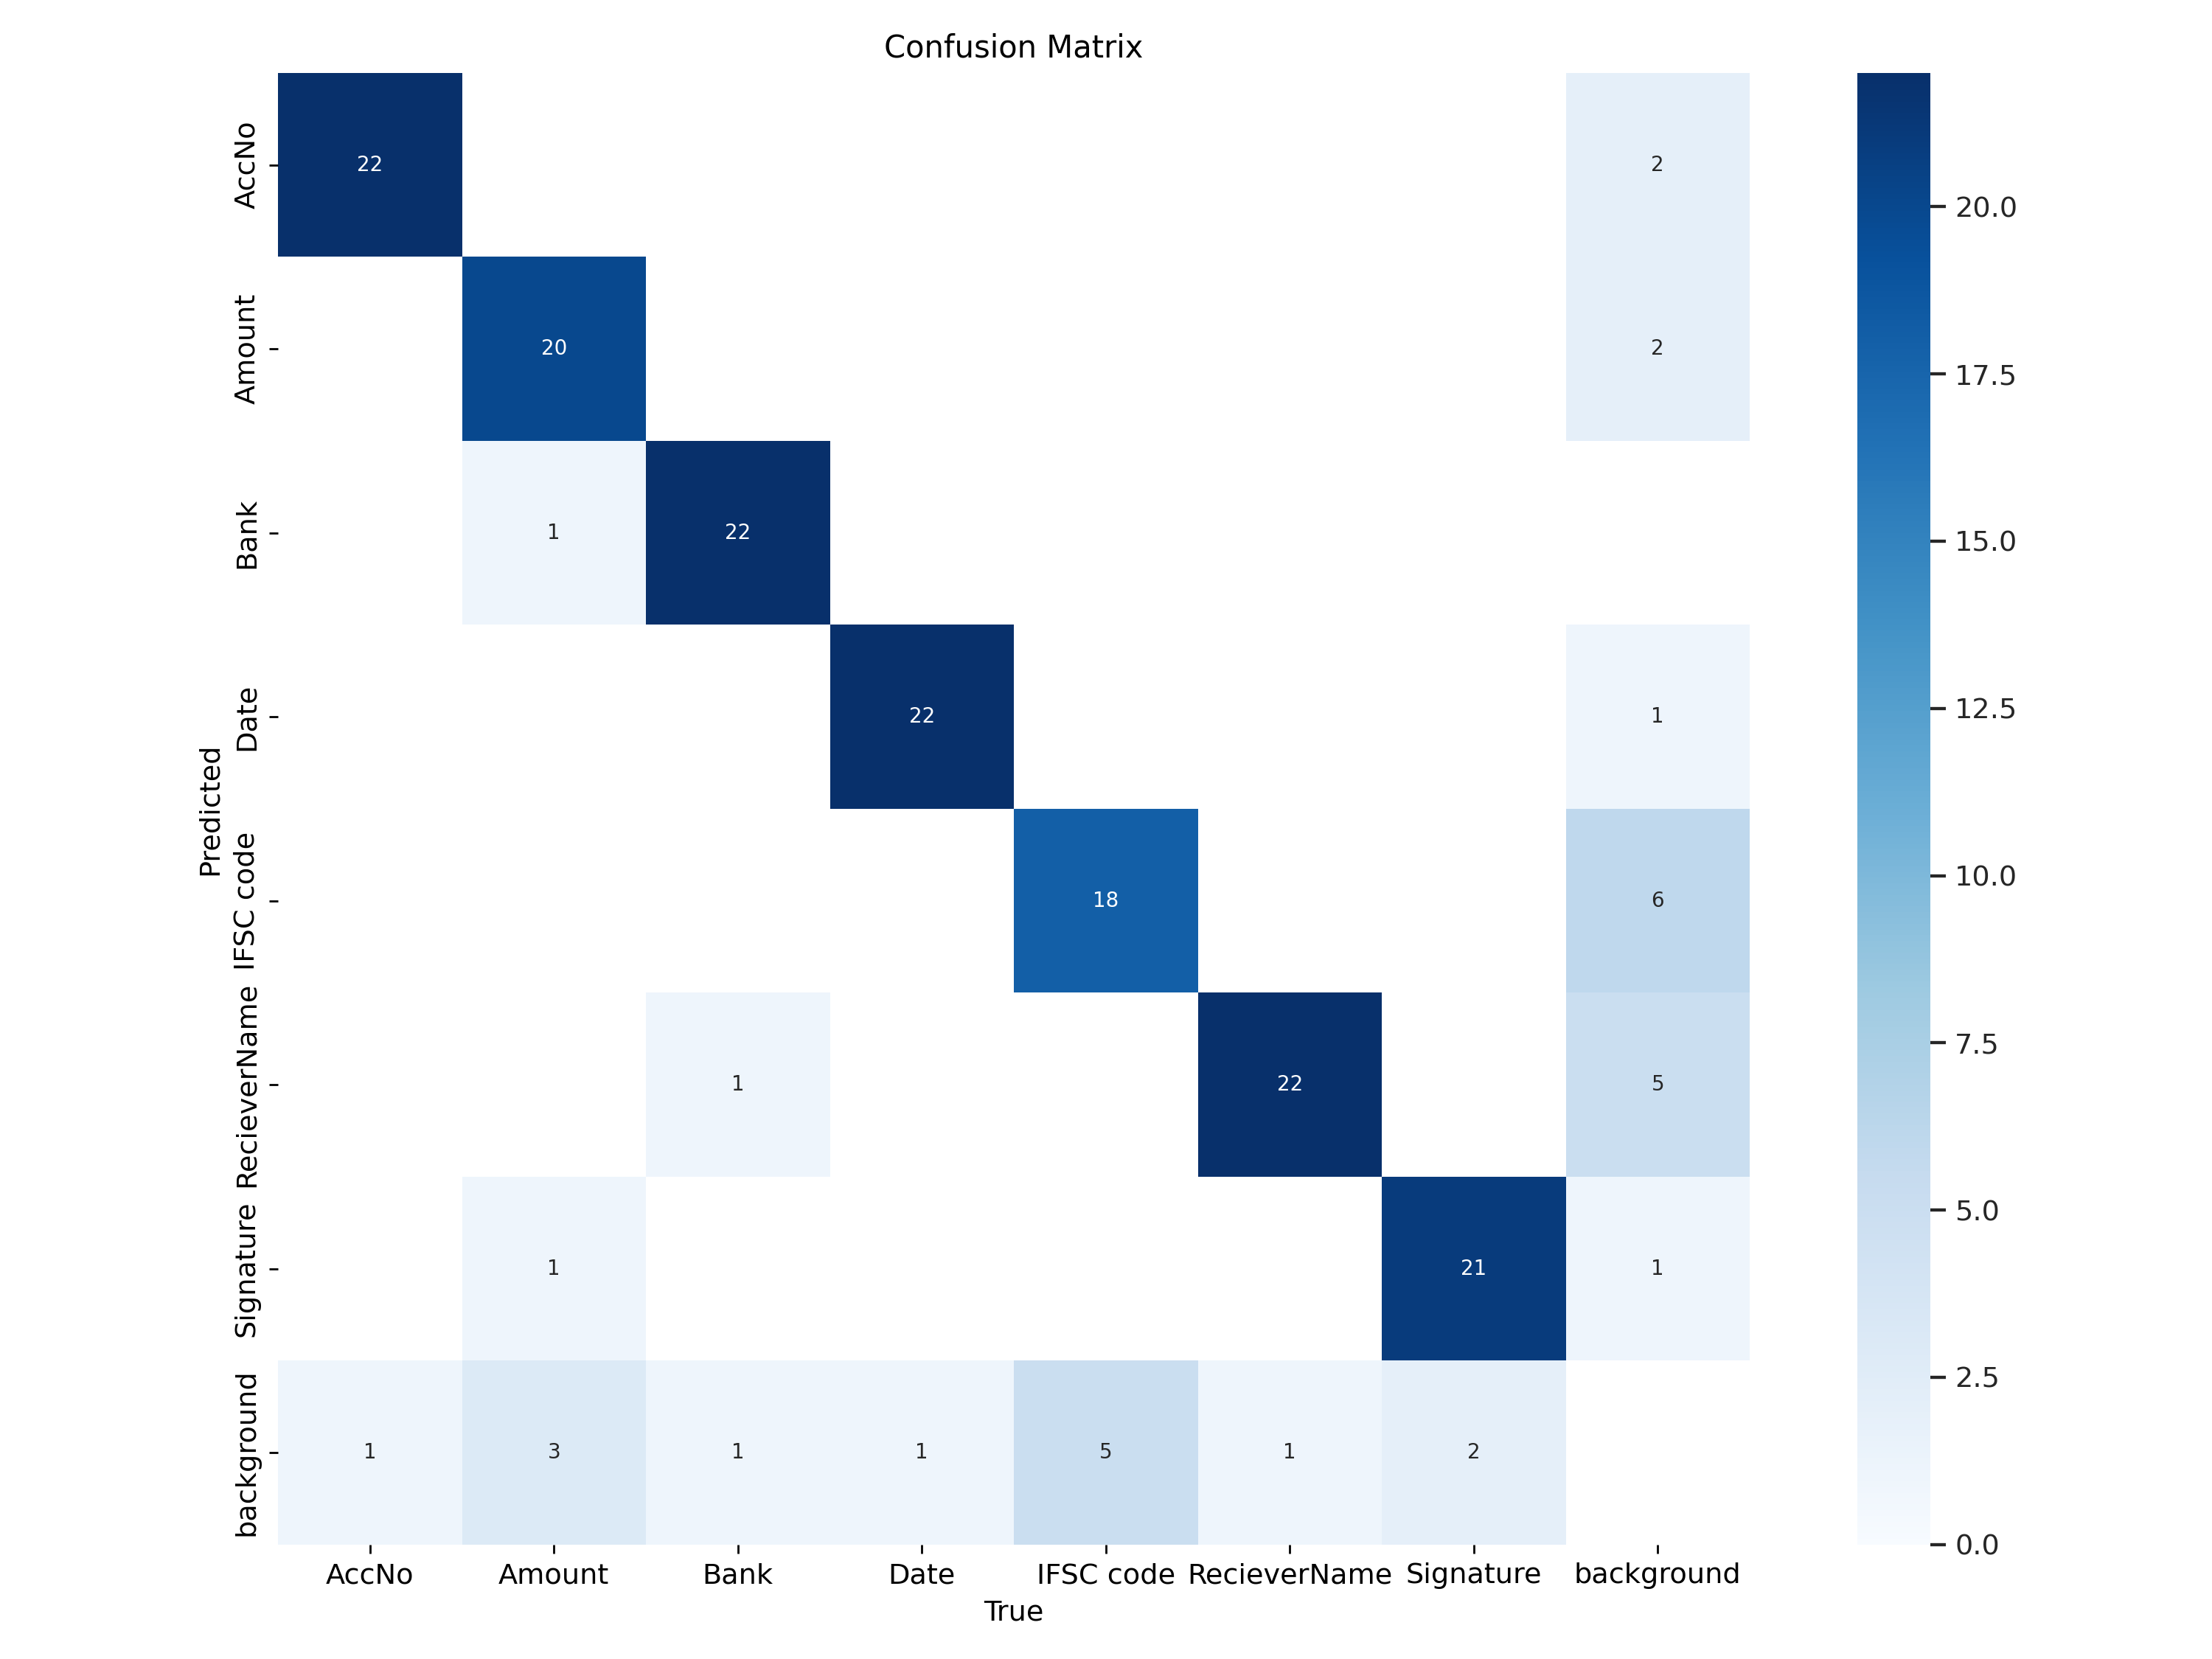

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

/content


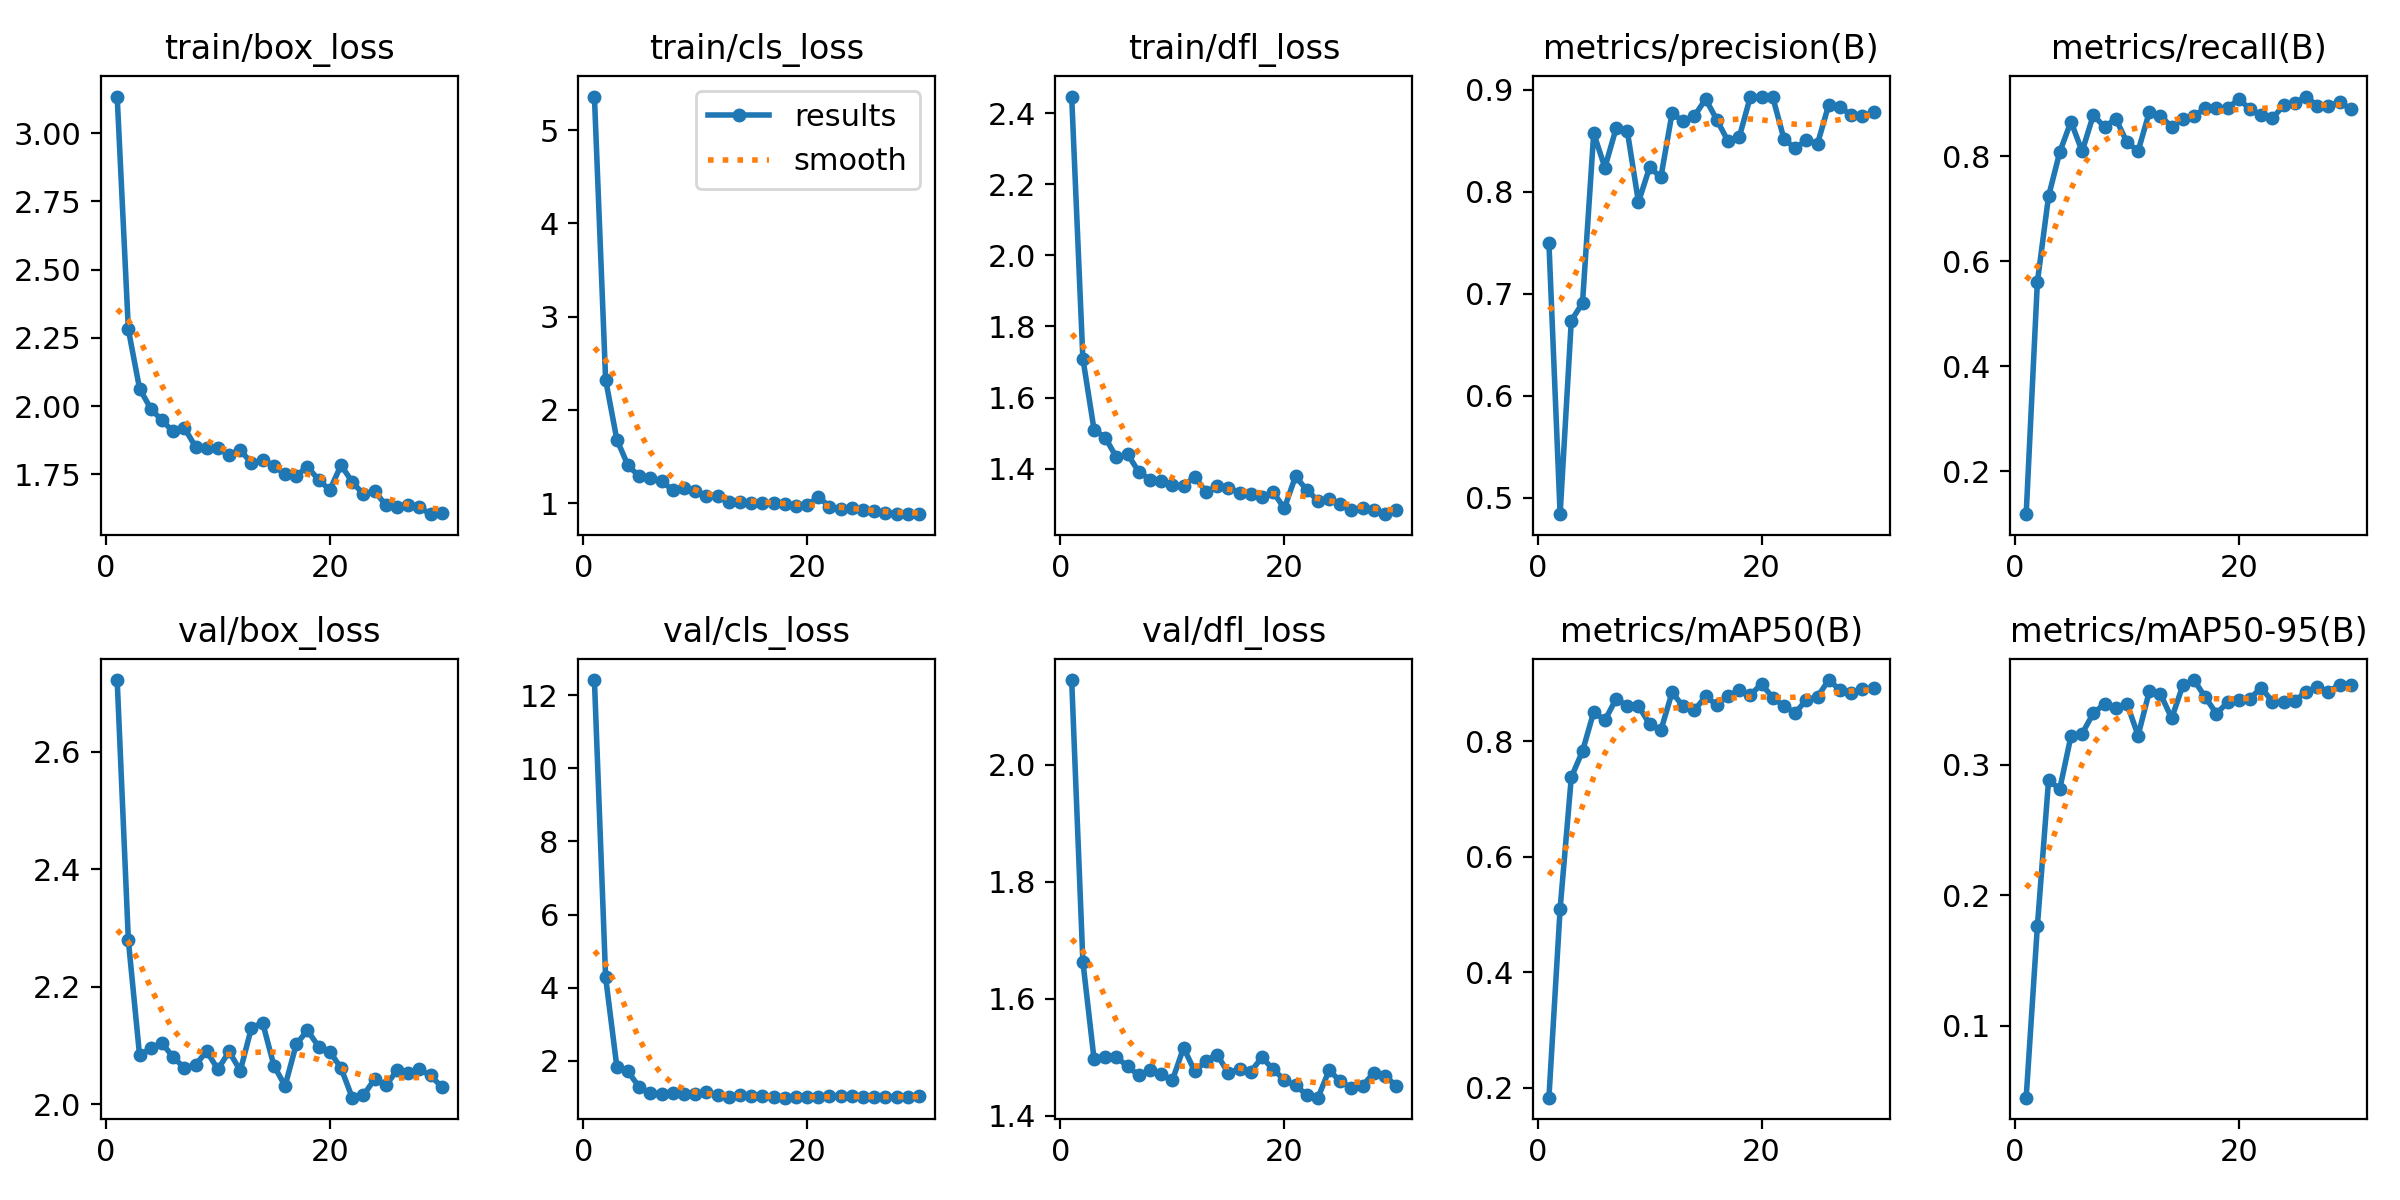

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/results.png', width=600)

/content


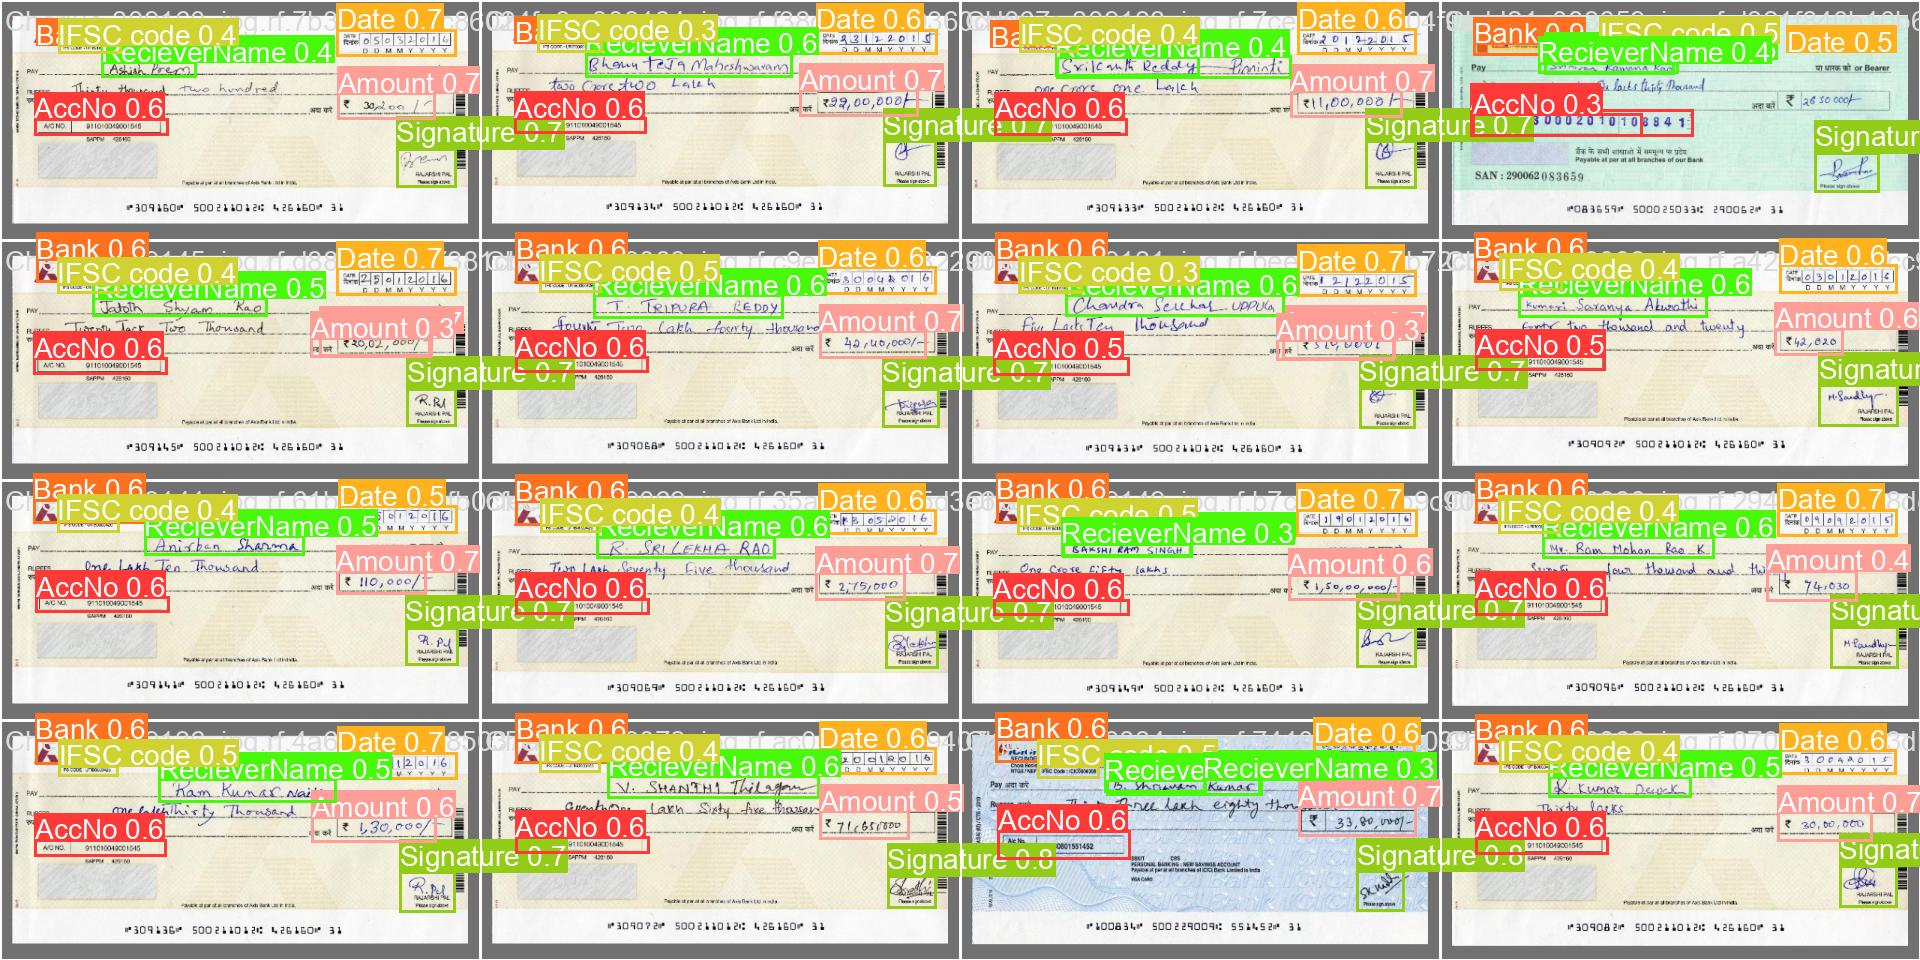

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [29]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/cheque-detection-2/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.01s/it]
                   all         23        164      0.863      0.871      0.859      0.361
                 AccNo         23         23      0.918      0.957      0.953       0.37
                Amount         23         25      0.908       0.76      0.812       0.26
                  Bank         23         24      0.926      0.917      0.901      0.508
                  Date         23         23      0.935      0.957      0.979      0.456
             IFSC code         23         23      0.564      0.564      0.426      0.164
          RecieverName         23  

## Inference with Custom Model

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/11 /content/cheque-detection-2/test/images/Cheque-120613_jpg.rf.a89e372820c1b3047ba736ab9a1e1920.jpg: 288x608 1 AccNo, 1 Amount, 1 Bank, 1 Date, 1 IFSC code, 1 RecieverName, 1 Signature, 122.4ms
image 2/11 /content/cheque-detection-2/test/images/Cheque-120615_jpg.rf.1c9f32cbb4a133c87275839e0dd613c6.jpg: 288x608 1 AccNo, 1 Bank, 1 Date, 1 IFSC code, 1 RecieverName, 1 Signature, 10.3ms
image 3/11 /content/cheque-detection-2/test/images/Cheque-309061_jpg.rf.2bee0f4d83992313ad1a0bb8bac13a6c.jpg: 288x608 1 AccNo, 1 Amount, 1 Bank, 1 Date, 1 IFSC code, 1 RecieverName, 1 Signature, 10.3ms
image 4/11 /content/cheque-detection-2/test/images/Cheque-309079_jpg.rf.24bc8561ba73ab86f10faffe77a2eb67.jpg: 288x608 1 AccNo, 1 Amount, 1 Bank, 1 Date, 1 IFSC code, 2 RecieverNames, 1 Signature, 10.2ms
image 5/11 /content/c

# RESULTS

The images in this project are labeled into 7 distinct classes, each representing a key piece of information commonly found on documents like cheques. These classes are annotated with bounding boxes to facilitate precise detection and classification by the YOLOv8 model. The classes are as follows:
1.   AccNo
2.   Amount
3.   Bank
4.   Date
5.   IFSC Code
6.   Reciever Name
7.   Signature

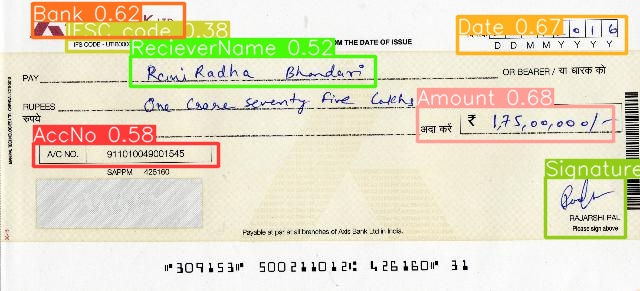

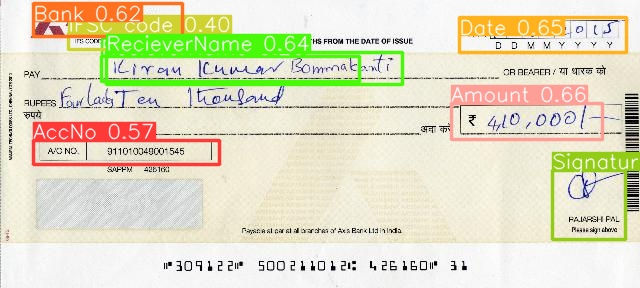

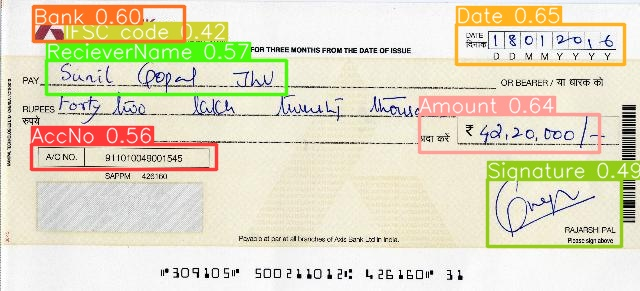

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")